<a href="https://colab.research.google.com/github/ianmuchai/Car_Resale_Data-Data_Science_Project/blob/main/New_Car_Resale_Dataset_Rerun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Key features of the dataset
#full_name: Name of the car along with model
#resale_price: Resale price of the car
#registered_year: Year the car was registered
#engine_capacity: Engine Displacement of car (cc)
#insurance: Type of insurance made available for the car (if any)
#transmission_type: Transmission type of the car
#kms_driven: Total kilometers the car was driven for
#owner_type: Number of owners who previously owned the car
#fuel_type: Type of fuel the car uses
#max_power: Maximum power of the car (bhp)
#seats: Number of seats the car has
#mileage: Mileage of the car
#body_type: Body configuration of the car
#city: City in India the car is sold in

In [ ]:
#I will delete the insurance column because it doesn't provide meaningful insights.
# The maxpower of the vehicles will also be excluded from the dataset considering that you can test performance without it.

In [5]:
!pip install pandas #for data analysis and manipulation

In [4]:
!pip install openpyxl #Library to use for reading and writing Excel files

In [3]:
import pandas as pd ##import libraries into JN

In [2]:
from google.colab import files #to enable upload of local files

In [11]:
uploaded = files.upload() #to upload the files

Saving car_resale_prices.csv to car_resale_prices.csv


In [12]:
file_name = 'car_resale_prices.csv' # defining the data

In [13]:
data = pd.read_csv(file_name) # reading the files into pandas

In [58]:
data.head() #to display the CSV file contents

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [ ]:
missing_values = data.isnull().sum()

In [ ]:
print("columns with missing values")
print(missing_values[missing_values > 0]) #to  the columns with missing values and their frequency against the data set size to determine the next steps

columns with missing values
registered_year     69
engine_capacity     14
insurance            7
kms_driven           3
owner_type          45
max_power          102
seats               10
mileage            508
dtype: int64


In [ ]:
data_cleaned = data.dropna(how='any') #to delete rows that have blank columns

In [ ]:
print("Original DataFrame shape:", data.shape)
print("DataFrame shape after removing rows with any missing values:", data_cleaned.shape) #to check if the blank cells have been removed from the data

Original DataFrame shape: (17446, 15)
DataFrame shape after removing rows with any missing values: (16792, 15)


In [ ]:
columns_to_delete = ["insurance","max_power"] #to delete the insurance and max_power columns because we don't need them

In [ ]:
data = data.drop(columns=columns_to_delete, axis=1)

In [ ]:
data['Year'] = data['full_name'].str.extract('(\d{4})', expand=False)
data['Model'] = data['full_name'].str.replace('(\d{4})', '').str.strip() # to separate the full_name column year and name of vehicle model

<ipython-input-15-1621b4b27686>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Model'] = data['full_name'].str.replace('(\d{4})', '').str.strip() # to separate the full_name column year and name of vehicle model


In [ ]:
data = data.drop(columns=['full_name','registered_year']) # to delete the full_name column and registered_year column  because we now have the Year column with the same information

In [ ]:
data.head()

,Unnamed: 0,resale_price,engine_capacity,transmission_type,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,Year,Model
0,0,₹ 5.45 Lakh,1197 cc,Manual,"40,000 Kms",First Owner,Petrol,5.0,21.4 kmpl,Hatchback,Agra,2017,Maruti Baleno 1.2 Alpha
1,1,₹ 10 Lakh,2179 cc,Automatic,"70,000 Kms",First Owner,Diesel,7.0,17.6 kmpl,MUV,Agra,2018,Tata Hexa XTA
2,2,₹ 4.50 Lakh,1197 cc,Manual,"70,000 Kms",Second Owner,Petrol,5.0,20.85 kmpl,Sedan,Agra,2015,Maruti Swift Dzire VXI
3,3,₹ 4.50 Lakh,1197 cc,Manual,"70,000 Kms",Second Owner,Petrol,5.0,20.85 kmpl,Sedan,Agra,2015,Maruti Swift Dzire VXI
4,4,₹ 1.60 Lakh,1086 cc,Manual,"80,000 Kms",First Owner,Petrol,5.0,19.81 kmpl,Hatchback,Agra,2009,Hyundai i10 Magna 1.1


In [ ]:
missing_values = data.isnull().sum()
print("rows with missing values")
print(missing_values[missing_values > 0]) #to  the columns with missing values and their frequency against the data set size to determine the next steps

rows with missing values
engine_capacity     14
kms_driven           3
owner_type          45
seats               10
mileage            508
dtype: int64


In [ ]:
data_cleaned = data.dropna(how='any') #to delete rows that have blank columns

In [ ]:
print("Original DataFrame shape:", data.shape)
print("DataFrame shape after removing rows with any missing values:", data_cleaned.shape) #to check if the blank cells have been removed from the data

Original DataFrame shape: (17446, 13)
DataFrame shape after removing rows with any missing values: (16880, 13)


In [ ]:
# We need to clean numeric columns to remove non-numeric information first and then tranform the data types to numeric types
data['engine_capacity'] = data['engine_capacity'].str.replace(r'[^0-9]', '', regex=True)
data['resale_price'] = data['resale_price'].str.replace(r'[^0-9]', '', regex=True)
data['kms_driven'] = data['kms_driven'].str.replace(r'[^0-9]', '', regex=True)
data['mileage'] = data['mileage'].str.replace(r'[^0-9]', '', regex=True)

In [ ]:
data.head()

,Unnamed: 0,resale_price,engine_capacity,transmission_type,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,Year,Model
0,0,545,1197,Manual,40000,First Owner,Petrol,5.0,214,Hatchback,Agra,2017,Maruti Baleno 1.2 Alpha
1,1,10,2179,Automatic,70000,First Owner,Diesel,7.0,176,MUV,Agra,2018,Tata Hexa XTA
2,2,450,1197,Manual,70000,Second Owner,Petrol,5.0,2085,Sedan,Agra,2015,Maruti Swift Dzire VXI
3,3,450,1197,Manual,70000,Second Owner,Petrol,5.0,2085,Sedan,Agra,2015,Maruti Swift Dzire VXI
4,4,160,1086,Manual,80000,First Owner,Petrol,5.0,1981,Hatchback,Agra,2009,Hyundai i10 Magna 1.1


In [ ]:
data['engine_capacity'] = pd.to_numeric(data['engine_capacity'].str.replace(r'[^0-9]', '', regex=True), errors='coerce').astype(float)
data['kms_driven'] = pd.to_numeric(data['kms_driven'].str.replace(r'[^0-9]', '', regex=True), errors='coerce').astype(float)
data['mileage'] = pd.to_numeric(data['mileage'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce').astype(float) # Successful. Changing the 3 columns to numeric float data types.

In [ ]:
data.head()

,Unnamed: 0,resale_price,engine_capacity,transmission_type,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,Year,Model
0,0,545,1197.0,Manual,40000.0,First Owner,Petrol,5.0,214.0,Hatchback,Agra,2017,Maruti Baleno 1.2 Alpha
1,1,10,2179.0,Automatic,70000.0,First Owner,Diesel,7.0,176.0,MUV,Agra,2018,Tata Hexa XTA
2,2,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015,Maruti Swift Dzire VXI
3,3,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015,Maruti Swift Dzire VXI
4,4,160,1086.0,Manual,80000.0,First Owner,Petrol,5.0,1981.0,Hatchback,Agra,2009,Hyundai i10 Magna 1.1


In [ ]:
excel_file_path = '/content/cleaned_car_resale_data.xlsx'
data.to_excel(excel_file_path, index=False)
print(f'DataFrame saved to {excel_file_path}') # saving the cleaned data

DataFrame saved to /content/cleaned_car_resale_data.xlsx


In [ ]:
files.download(excel_file_path) # to download the cleaned data excel file.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
uploaded = files.upload()

Saving cleaned_car_resale_data (1).csv to cleaned_car_resale_data (1) (2).csv


In [58]:
file_name = 'cleaned_car_resale_data (1).csv'

In [59]:
data = pd.read_csv(file_name)

In [60]:
data.head()

,Unnamed: 0,resale_price,engine_capacity,transmission_type,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,Year,Model
0,0,545,1197.0,Manual,40000.0,First Owner,Petrol,5.0,214.0,Hatchback,Agra,2017,Maruti Baleno 1.2 Alpha
1,1,10,2179.0,Automatic,70000.0,First Owner,Diesel,7.0,176.0,MUV,Agra,2018,Tata Hexa XTA
2,2,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015,Maruti Swift Dzire VXI
3,3,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015,Maruti Swift Dzire VXI
4,4,160,1086.0,Manual,80000.0,First Owner,Petrol,5.0,1981.0,Hatchback,Agra,2009,Hyundai i10 Magna 1.1


In [61]:
print(data['Year'].dtype) # to check the datatype of the Year column

int64


In [62]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y') # To change the datatype of the Year column from object to datetime type

In [63]:
print(data["Year"].dtype)

datetime64[ns]


In [64]:
import datetime

In [65]:
current_year = datetime.datetime.now().year
data['car_age'] = current_year - data['Year'].dt.year # Generating a new column with the car age. This is critical for understanding how car age is correlated with the resale price.

In [66]:
data.head()

,Unnamed: 0,resale_price,engine_capacity,transmission_type,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,Year,Model,car_age
0,0,545,1197.0,Manual,40000.0,First Owner,Petrol,5.0,214.0,Hatchback,Agra,2017-01-01,Maruti Baleno 1.2 Alpha,6
1,1,10,2179.0,Automatic,70000.0,First Owner,Diesel,7.0,176.0,MUV,Agra,2018-01-01,Tata Hexa XTA,5
2,2,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8
3,3,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8
4,4,160,1086.0,Manual,80000.0,First Owner,Petrol,5.0,1981.0,Hatchback,Agra,2009-01-01,Hyundai i10 Magna 1.1,14


In [67]:
data['mileage_per_year'] = data['mileage']/data['car_age'] # Generating the mileage per year for each car to provide insights into the usage patterns of different vehicles

In [68]:
data.head()

,Unnamed: 0,resale_price,engine_capacity,transmission_type,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,Year,Model,car_age,mileage_per_year
0,0,545,1197.0,Manual,40000.0,First Owner,Petrol,5.0,214.0,Hatchback,Agra,2017-01-01,Maruti Baleno 1.2 Alpha,6,35.666667
1,1,10,2179.0,Automatic,70000.0,First Owner,Diesel,7.0,176.0,MUV,Agra,2018-01-01,Tata Hexa XTA,5,35.200000
2,2,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8,260.625000
3,3,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8,260.625000
4,4,160,1086.0,Manual,80000.0,First Owner,Petrol,5.0,1981.0,Hatchback,Agra,2009-01-01,Hyundai i10 Magna 1.1,14,141.500000


In [69]:
data['resale_price'] = pd.to_numeric(data['resale_price'], errors='coerce')

In [70]:
data['price_per_km'] = data['resale_price'] / data['kms_driven'] # Generating the price per kilometer driven to understand how the resale price varies based on the distance a car has been driven.

In [71]:
data.head()

,Unnamed: 0,resale_price,engine_capacity,transmission_type,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,Year,Model,car_age,mileage_per_year,price_per_km
0,0,545,1197.0,Manual,40000.0,First Owner,Petrol,5.0,214.0,Hatchback,Agra,2017-01-01,Maruti Baleno 1.2 Alpha,6,35.666667,0.013625
1,1,10,2179.0,Automatic,70000.0,First Owner,Diesel,7.0,176.0,MUV,Agra,2018-01-01,Tata Hexa XTA,5,35.200000,0.000143
2,2,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8,260.625000,0.006429
3,3,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8,260.625000,0.006429
4,4,160,1086.0,Manual,80000.0,First Owner,Petrol,5.0,1981.0,Hatchback,Agra,2009-01-01,Hyundai i10 Magna 1.1,14,141.500000,0.002000


In [29]:
# data = pd.get_dummies(data, columns=['transmission_type', 'owner_type', 'fuel_type', 'body_type']) # One-Hot categorical feature encoding to convert variables or features to numerical formats to enable effective interpretation and anlysis of data.

In [72]:
print(data.dtypes)

Unnamed: 0                    int64
resale_price                  int64
engine_capacity             float64
transmission_type            object
kms_driven                  float64
owner_type                   object
fuel_type                    object
seats                       float64
mileage                     float64
body_type                    object
city                         object
Year                 datetime64[ns]
Model                        object
car_age                       int64
mileage_per_year            float64
price_per_km                float64
dtype: object


In [73]:
data.dropna(subset=['resale_price', 'Year', 'engine_capacity', 'kms_driven', 'seats', 'mileage', 'city', 'Model'], inplace=True)  # Drop rows with missing values

In [74]:
data.head()

,Unnamed: 0,resale_price,engine_capacity,transmission_type,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,Year,Model,car_age,mileage_per_year,price_per_km
0,0,545,1197.0,Manual,40000.0,First Owner,Petrol,5.0,214.0,Hatchback,Agra,2017-01-01,Maruti Baleno 1.2 Alpha,6,35.666667,0.013625
1,1,10,2179.0,Automatic,70000.0,First Owner,Diesel,7.0,176.0,MUV,Agra,2018-01-01,Tata Hexa XTA,5,35.200000,0.000143
2,2,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8,260.625000,0.006429
3,3,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8,260.625000,0.006429
4,4,160,1086.0,Manual,80000.0,First Owner,Petrol,5.0,1981.0,Hatchback,Agra,2009-01-01,Hyundai i10 Magna 1.1,14,141.500000,0.002000


In [ ]:
# from scipy import stats

# z_scores = stats.zscore(data[['resale_price', 'kms_driven']])
# data = data[(z_scores < 3).all(axis=1)]  # Identify and remove outliers in numerical columns using z-scores to keep only rows without outliers. Outliers can significantly impact summary statistics.

In [75]:
data.head()

,Unnamed: 0,resale_price,engine_capacity,transmission_type,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,Year,Model,car_age,mileage_per_year,price_per_km
0,0,545,1197.0,Manual,40000.0,First Owner,Petrol,5.0,214.0,Hatchback,Agra,2017-01-01,Maruti Baleno 1.2 Alpha,6,35.666667,0.013625
1,1,10,2179.0,Automatic,70000.0,First Owner,Diesel,7.0,176.0,MUV,Agra,2018-01-01,Tata Hexa XTA,5,35.200000,0.000143
2,2,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8,260.625000,0.006429
3,3,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8,260.625000,0.006429
4,4,160,1086.0,Manual,80000.0,First Owner,Petrol,5.0,1981.0,Hatchback,Agra,2009-01-01,Hyundai i10 Magna 1.1,14,141.500000,0.002000


In [76]:
avg_price_by_engine_capacity = data.groupby('engine_capacity')['resale_price'].mean() # Summarizing body type data through aggregation to compute the average price per body type

In [77]:
data.head()

,Unnamed: 0,resale_price,engine_capacity,transmission_type,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,Year,Model,car_age,mileage_per_year,price_per_km
0,0,545,1197.0,Manual,40000.0,First Owner,Petrol,5.0,214.0,Hatchback,Agra,2017-01-01,Maruti Baleno 1.2 Alpha,6,35.666667,0.013625
1,1,10,2179.0,Automatic,70000.0,First Owner,Diesel,7.0,176.0,MUV,Agra,2018-01-01,Tata Hexa XTA,5,35.200000,0.000143
2,2,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8,260.625000,0.006429
3,3,450,1197.0,Manual,70000.0,Second Owner,Petrol,5.0,2085.0,Sedan,Agra,2015-01-01,Maruti Swift Dzire VXI,8,260.625000,0.006429
4,4,160,1086.0,Manual,80000.0,First Owner,Petrol,5.0,1981.0,Hatchback,Agra,2009-01-01,Hyundai i10 Magna 1.1,14,141.500000,0.002000


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ipywidgets import interact # For visualizations and statistical analysis

In [80]:
plt.figure(figsize=(12, 8)) # to plot a figure

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

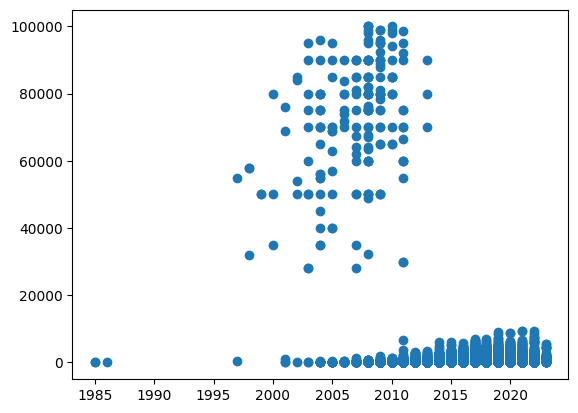

In [85]:
plt.scatter(data['Year'], data['resale_price'], label='Resale Price') # Scatter plot to show 'Year' vs 'resale_price'

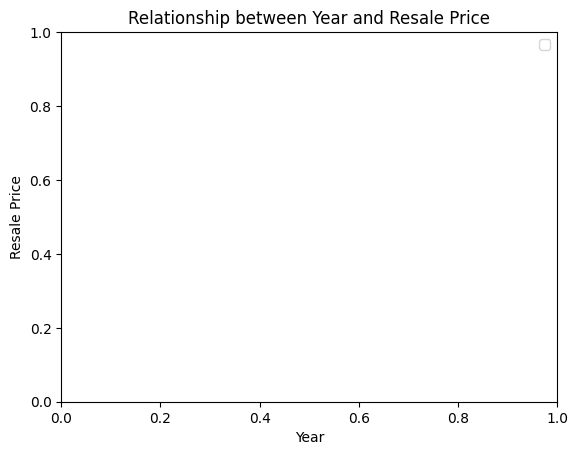

In [88]:
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.title('Relationship between Year and Resale Price')
plt.legend(['Resale Price']) # Adding labels and a legend

In [89]:
plt.show()